# week 2 exercise


In [2]:
import graphlab

In [3]:
sales = graphlab.SFrame('home_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to dxiao@bloomu.edu and will expire on April 02, 2020.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\danqi\AppData\Local\Temp\graphlab_server_1554694502.log.0


In [4]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


# ##exploring data for housing


In [6]:
sales.show(view='Scatter Plot',x="sqft_living",y="price")

Canvas is accessible via web browser at the URL: http://localhost:51484/index.html
Opening Canvas in default web browser.


## train data

train_data,test_data = sales.random_split(.8,seed=0)

## build regression model

In [8]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living'],validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.004151     | 4349521.926170     | 262943.613754 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [9]:
print test_data['price'].mean()

543054.042563


In [10]:
print sqft_model.evaluate(test_data)

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527358}


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

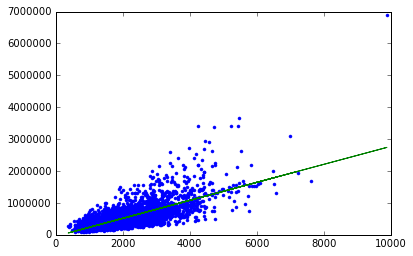

In [13]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(test_data),'-')

In [14]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-47114.0206702,4923.34437753
sqft_living,None,281.957850166,2.16405465323


In [15]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
sales[my_features].show()

Canvas is accessible via web browser at the URL: http://localhost:51484/index.html
Opening Canvas in default web browser.


In [53]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

Canvas is accessible via web browser at the URL: http://localhost:51484/index.html
Opening Canvas in default web browser.


In [17]:
my_features_model = graphlab.linear_regression.create(train_data,target='price',features=my_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.021940     | 3763208.270523     | 181908.848367 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [18]:
my_features_model.get('coefficients')

name,index,value,stderr
(intercept),None,-88006.8416465,13167.1778025
bedrooms,2,21165.5766369,4892.4148316
bedrooms,4,-41706.3113919,3600.23032619
bedrooms,5,-92815.3727611,6185.8669821
bedrooms,1,45824.7402238,15487.2986256
bedrooms,6,-179627.840979,13060.1531948
bedrooms,7,-370367.546312,33894.1528762
bedrooms,8,-343106.520191,56609.2407592
bedrooms,0,-13095.4952099,70106.1085644
bedrooms,9,-432903.521695,82975.5547771


In [20]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [21]:
print sqft_model.evaluate(test_data)

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527358}


In [22]:
print my_features_model.evaluate(test_data)

{'max_error': 3486584.509381705, 'rmse': 179542.4333126903}


In [26]:
my_features_model.get('coefficients')

name,index,value,stderr
(intercept),None,-88006.8416465,13167.1778025
bedrooms,2,21165.5766369,4892.4148316
bedrooms,4,-41706.3113919,3600.23032619
bedrooms,5,-92815.3727611,6185.8669821
bedrooms,1,45824.7402238,15487.2986256
bedrooms,6,-179627.840979,13060.1531948
bedrooms,7,-370367.546312,33894.1528762
bedrooms,8,-343106.520191,56609.2407592
bedrooms,0,-13095.4952099,70106.1085644
bedrooms,9,-432903.521695,82975.5547771


In [28]:
print rows(num_rows=40, num_columns=4)

NameError: name 'rows' is not defined

In [30]:
table1=my_features_model.get('coefficients')

In [31]:
table1

name,index,value,stderr
(intercept),None,-88006.8416465,13167.1778025
bedrooms,2,21165.5766369,4892.4148316
bedrooms,4,-41706.3113919,3600.23032619
bedrooms,5,-92815.3727611,6185.8669821
bedrooms,1,45824.7402238,15487.2986256
bedrooms,6,-179627.840979,13060.1531948
bedrooms,7,-370367.546312,33894.1528762
bedrooms,8,-343106.520191,56609.2407592
bedrooms,0,-13095.4952099,70106.1085644
bedrooms,9,-432903.521695,82975.5547771


In [32]:
table1.print_rows(num_rows=40, num_columns=4)

+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -88006.8416465 | 13167.1778025 |
|   bedrooms  |   2   | 21165.5766369  |  4892.4148316 |
|   bedrooms  |   4   | -41706.3113919 | 3600.23032619 |
|   bedrooms  |   5   | -92815.3727611 |  6185.8669821 |
|   bedrooms  |   1   | 45824.7402238  | 15487.2986256 |
|   bedrooms  |   6   | -179627.840979 | 13060.1531948 |
|   bedrooms  |   7   | -370367.546312 | 33894.1528762 |
|   bedrooms  |   8   | -343106.520191 | 56609.2407592 |
|   bedrooms  |   0   | -13095.4952099 | 70106.1085644 |
|   bedrooms  |   9   | -432903.521695 | 82975.5547771 |
|   bedrooms  |   10  |  -619048.4872  | 107182.890642 |
|  bathrooms  |  2.25 | -37510.897359  | 6544.37620443 |
|  bathrooms  |   3   | -29969.8176132 | 9402.49016635 |
|  bathrooms  |   2   | -39866.213104  | 6077.55753032 |
|  bathrooms  |  4.5  | 184378.

In [33]:
house1 = sales[sales['id']=='5309101200']

In [34]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [35]:
print house1['price']

[620000L, ... ]


In [36]:
print sqft_model.predict(house1)

[629584.8197281545]


In [37]:
print my_features_model.predict(house1)

[721918.9333272863]


In [38]:
house2 = sales[sales['id']=='1925069082']

In [39]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [40]:
print sqft_model.predict(house2)

[1261170.404099968]


In [41]:
print my_features_model.predict(house2)

[1446472.4690774973]


In [42]:
print house2['price']

[2200000L]


In [43]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [44]:
print my_features_model.predict(graphlab.SFrame(bill_gates))

[13749825.525719076]


In [45]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [47]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [48]:
advanced_features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'zipcode',
 'condition',
 'grade',
 'waterfront',
 'view',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [49]:
ad_features_model = graphlab.linear_regression.create(train_data,target='price',features=advanced_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.051375     | 3469012.450686     | 154580.940736 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [50]:
print my_features_model.evaluate(test_data)

{'max_error': 3486584.509381705, 'rmse': 179542.4333126903}


In [52]:
print ad_features_model.evaluate(test_data)

{'max_error': 3556849.413858208, 'rmse': 156831.1168021901}


In [54]:
print 179542.4333126903-156831.1168021901

22711.3165105


In [56]:
sales['sqft_living']

dtype: int
Rows: 21613
[1180L, 2570L, 770L, 1960L, 1680L, 5420L, 1715L, 1060L, 1780L, 1890L, 3560L, 1160L, 1430L, 1370L, 1810L, 2950L, 1890L, 1600L, 1200L, 1250L, 1620L, 3050L, 2270L, 1070L, 2450L, 1710L, 2450L, 1400L, 1520L, 2570L, 2320L, 1190L, 2330L, 1090L, 2060L, 2300L, 1660L, 2360L, 1220L, 2620L, 2570L, 4220L, 3595L, 1570L, 1280L, 3160L, 990L, 2290L, 1250L, 2753L, 1190L, 3150L, 1410L, 1980L, 2730L, 2830L, 2250L, 2420L, 3250L, 1850L, 2150L, 1260L, 2519L, 1540L, 1660L, 2770L, 2720L, 2240L, 1000L, 3200L, 4770L, 1260L, 2750L, 2380L, 1790L, 3430L, 1760L, 1040L, 1410L, 3450L, 2350L, 1900L, 2020L, 1680L, 960L, 2140L, 2660L, 2770L, 1610L, 1030L, 1980L, 3520L, 1200L, 1580L, 1580L, 3300L, 1960L, 1160L, 1810L, 2320L, ... ]

In [60]:
def count_n(sqft):
    ntemp=0
    if sqft>2000 and sqft<4000:
        ntemp+=1
    return ntemp
        

In [61]:
totaln=sales['sqft_living'].apply(count_n)

In [62]:
print totaln

[0L, 1L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 0L, 1L, 0L, 0L, 0L, 0L, 1L, 0L, 0L, 0L, 0L, 0L, 1L, 1L, 0L, 1L, 0L, 1L, 0L, 0L, 1L, 1L, 0L, 1L, 0L, 1L, 1L, 0L, 1L, 0L, 1L, 1L, 0L, 1L, 0L, 0L, 1L, 0L, 1L, 0L, 1L, 0L, 1L, 0L, 0L, 1L, 1L, 1L, 1L, 1L, 0L, 1L, 0L, 1L, 0L, 0L, 1L, 1L, 1L, 0L, 1L, 0L, 0L, 1L, 1L, 0L, 1L, 0L, 0L, 0L, 1L, 1L, 0L, 1L, 0L, 0L, 1L, 1L, 1L, 0L, 0L, 0L, 1L, 0L, 0L, 0L, 1L, 0L, 0L, 0L, 1L, ... ]


In [63]:
totaln.show()

Canvas is updated and available in a tab in the default browser.
